Importing necessary packages

In [105]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

Reading the reviews data

In [106]:
data = pd.read_csv('Raw_Reviews.csv')

In [107]:
print(f"Dimensions of the data: {data.shape[0]} rows and {data.shape[1]} columns")
data.head()

Dimensions of the data: 23486 rows and 6 columns


,Product_ID,Age,Title,Text_Review,Rating,Type
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops


**Understanding the data better**

In [108]:
print(f"Dimensions of the data: {data.shape[0]} rows and {data.shape[1]} columns")

Dimensions of the data: 23486 rows and 6 columns


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product_ID   23486 non-null  int64 
 1   Age          23486 non-null  int64 
 2   Title        19676 non-null  object
 3   Text_Review  22641 non-null  object
 4   Rating       23486 non-null  int64 
 5   Type         23472 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [110]:
data.dtypes

Product_ID      int64
Age             int64
Title          object
Text_Review    object
Rating          int64
Type           object
dtype: object

**Data statistics**

In [111]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_ID,23486.0,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0


**Duplicate entries**

In [112]:
# calculating all instances of duplicate entries
all_dups = data[data.duplicated(keep=False)]
print("Number of all duplicate entries: {} rows".format(*all_dups.shape))

Number of all duplicate entries: 94 rows


In [113]:
# an example of duplicate entry
all_dups[all_dups['Product_ID']==1022]

,Product_ID,Age,Title,Text_Review,Rating,Type
9447,1022,37,NaN,"Love, love these jeans. being short they come ...",5,Bottoms
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,Bottoms


In [114]:
# considering only the first instance of the data as valid and counting further instances as duplicates
tot_dups = data[data.duplicated(keep='first')]
print("Total number of duplicate entries (ignoring first instance): {} rows".format(*tot_dups.shape))

Total number of duplicate entries (ignoring first instance): 50 rows


In [115]:
# Removing duplicate entries
df = data.drop_duplicates()
df

,Product_ID,Age,Title,Text_Review,Rating,Type
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops
...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,Tops
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,Dresses


In [116]:
# Checking for any more duplicate entries
df[df.duplicated(keep=False)]

,Product_ID,Age,Title,Text_Review,Rating,Type


In [117]:
print(f"Dimensions of the data without duplicates: {df.shape[0]} rows and {df.shape[1]} columns")

Dimensions of the data without duplicates: 23436 rows and 6 columns


**Analyzing missing and unique values within different attributes**

In [118]:
# Missing entries per attribute
pd.DataFrame(df.isna().sum(), columns=['Missing_Count']).T

,Product_ID,Age,Title,Text_Review,Rating,Type
Missing_Count,0,0,3760,796,0,14


In [119]:
# Unique entries per attribute
pd.DataFrame(list({col: df[col].nunique() for col in df.columns}.items()), columns=['','Unique_Count']).set_index('').T

,Product_ID,Age,Title,Text_Review,Rating,Type
Unique_Count,1206,77,13993,22634,5,6


Deleting entries with missing Text_Review

In [120]:
df = df.dropna(subset=['Text_Review'])

In [121]:
df.isna().sum()

Product_ID        0
Age               0
Title          2965
Text_Review       0
Rating            0
Type             13
dtype: int64

***Analyzing the data with respect to the different attributes***

**Age**

In [228]:
# Statistics of "Age"
df['Age'].describe()

count    22640.000000
mean        43.280654
std         12.327181
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

**Distribution of users' age**

In the appendix of the report the analysis done to obtain the optimal number of bins to plot the distribution of age can be found. As per Sturge's Rule the value was found to be 16. Since seaborn calculates the bin size as per the data inherently, seaborn was chosen to visualize the distribution of Age.

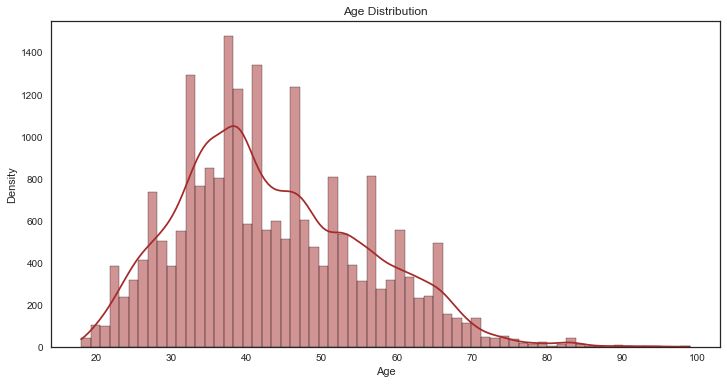

In [269]:
plt.figure(figsize=(12, 6))
sns.histplot(df.Age, kde=True, color='brown')
plt.title("Age Distribution")
plt.ylabel("Density")
plt.xlabel("Age")
plt.show()

Creating age buckets with respect to the age of reviewers

The following age buckets were chosen to ensure a relatively even distribution of 10 years except for the first (0-19) and last (80-100) buckets wherein the density is far less.

In [125]:
# Defining the age buckets
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-100']

In [126]:
# Creating a new column 'Age_Group' with the defined age buckets
df.loc[:,'Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

In [127]:
# checking if all the rows are populated
df['Age_Group'].isna().sum()

0

In [131]:
# reviews per age groups
df['Age_Group'].value_counts()

30-39     7345
40-49     5903
50-59     3834
20-29     2795
60-69     2256
70-79      355
80-100     108
0-19        44
Name: Age_Group, dtype: int64

In [200]:
df.to_csv("Reviews_with_age_groups.csv", index = False)

In [233]:
# statistics of rating with respect to age groups
df.groupby('Age_Group')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
0-19,44.0,4.227273,0.911519,1.0,4.00,4.0,5.0,5.0
20-29,2795.0,4.192129,1.099526,1.0,4.00,5.0,5.0,5.0
30-39,7345.0,4.153165,1.122209,1.0,4.00,5.0,5.0,5.0
40-49,5903.0,4.141962,1.133800,1.0,4.00,5.0,5.0,5.0
50-59,3834.0,4.226395,1.102080,1.0,4.00,5.0,5.0,5.0
60-69,2256.0,4.292996,1.076524,1.0,4.00,5.0,5.0,5.0
70-79,355.0,4.183099,1.168197,1.0,4.00,5.0,5.0,5.0
80-100,108.0,4.472222,1.071799,1.0,4.75,5.0,5.0,5.0


**Distribution of users per age group**

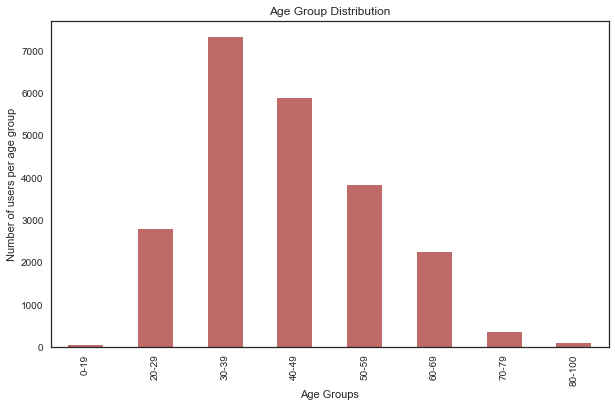

In [272]:
plt.figure(figsize=(10,6))
df['Age_Group'].value_counts().sort_index().plot(color='brown', kind = 'bar', alpha=0.7)
plt.xlabel('Age Groups')
plt.ylabel('Number of users per age group')
plt.title('Age Group Distribution')
plt.show()

**Type**

In [226]:
# Number of entries per unique values in "Type"
pd.DataFrame(df['Type'].value_counts()).T

,Tops,Dresses,Bottoms,Intimate,Jackets,Trend
Type,10048,6145,3661,1653,1002,118


**Distribution of product types**

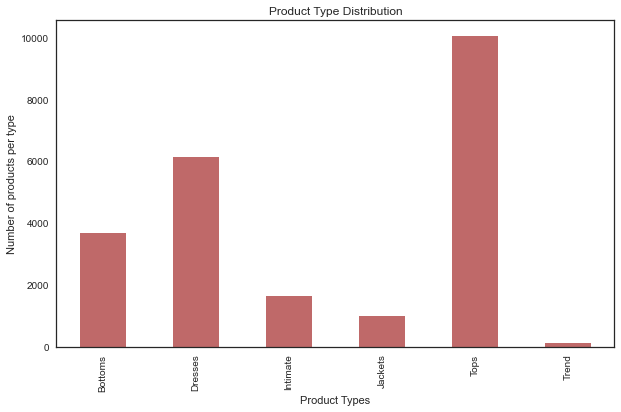

In [274]:
plt.figure(figsize=(10,6))
df['Type'].value_counts().sort_index().plot(color='brown', kind = 'bar', alpha=0.7)
plt.xlabel('Product Types')
plt.ylabel('Number of products per type')
plt.title('Product Type Distribution')
plt.show()

**Rating**

In [227]:
# Number of entries per unique values in "Rating"
pd.DataFrame(df['Rating'].value_counts()).T

,5,4,3,2,1
Rating,12539,4908,2823,1549,821


**Distribution of users' ratings**

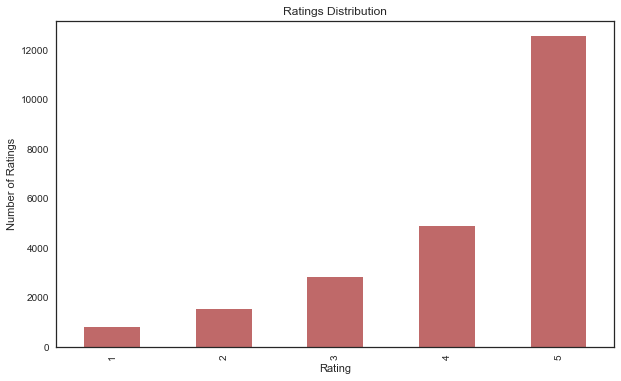

In [273]:
plt.figure(figsize=(10,6))
df['Rating'].value_counts().sort_index().plot(color='brown', kind = 'bar', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Ratings Distribution')
plt.show()

**Top 10 product_ids with most reviews**

In [72]:
prod_counts = {j[0]:j[1] for i,j in enumerate(df['Product_ID'].value_counts().items())}
top_10 = dict(sorted(prod_counts.items(), key = lambda i: i[1], reverse=True)[:10])
top_10

{1078: 987,
 862: 778,
 1094: 735,
 1081: 561,
 872: 519,
 829: 512,
 1110: 471,
 868: 414,
 895: 384,
 936: 348}

In [73]:
pd.DataFrame(data = {'Product_ID' : top_10.keys(), 'Count': top_10.values()})

,Product_ID,Count
0,1078,987
1,862,778
2,1094,735
3,1081,561
4,872,519
5,829,512
6,1110,471
7,868,414
8,895,384
9,936,348


**5 most reviewed product_ids within each type**

In [193]:
pd.DataFrame(df.groupby(['Type'])['Product_ID'].value_counts().rename('Count').groupby('Type').nlargest(5).reset_index(level=1, drop=True))

Count
Type     Product_ID       
Bottoms  1059          287
         1033          212
         1056          206
         1022          194
         1008          180
Dresses  1078          987
         1094          735
         1081          561
         1110          471
         1095          323
Intimate 169            32
         520            29
         375            19
         774            18
         194            16
Jackets  984           166
         975           113
         964            73
         974            49
         1121           48
Tops     862           778
         872           519
         829           512
         868           414
         895           384
Trend    573            10
         1135           10
         1146           10
         1147           10
         1145            9

In [194]:
d2 = {
    'Type': ['Bottoms', 'Bottoms', 'Bottoms', 'Bottoms', 'Bottoms', 
             'Dresses', 'Dresses', 'Dresses', 'Dresses', 'Dresses', 
             'Intimate', 'Intimate', 'Intimate', 'Intimate', 'Intimate', 
             'Jackets', 'Jackets', 'Jackets', 'Jackets', 'Jackets', 
             'Tops', 'Tops', 'Tops', 'Tops', 'Tops', 
             'Trend', 'Trend', 'Trend', 'Trend', 'Trend'],
    'Product_ID': [1059, 1033, 1056, 1022, 1008, 
                   1078, 1094, 1081, 1110, 1095, 
                   169, 520, 375, 774, 194, 
                   984, 975, 964, 974, 1121, 
                   862, 872, 829, 868, 895, 
                   573, 1135, 1146, 1147, 1145],
    'Count': [287, 212, 206, 194, 180, 
              987, 735, 561, 471, 323, 
              32, 29, 19, 18, 16, 
              166, 113, 73, 49, 48, 
              778, 519, 512, 414, 384, 
              10, 10, 10, 10, 9]
}

In [195]:
d2 = pd.DataFrame(d2)

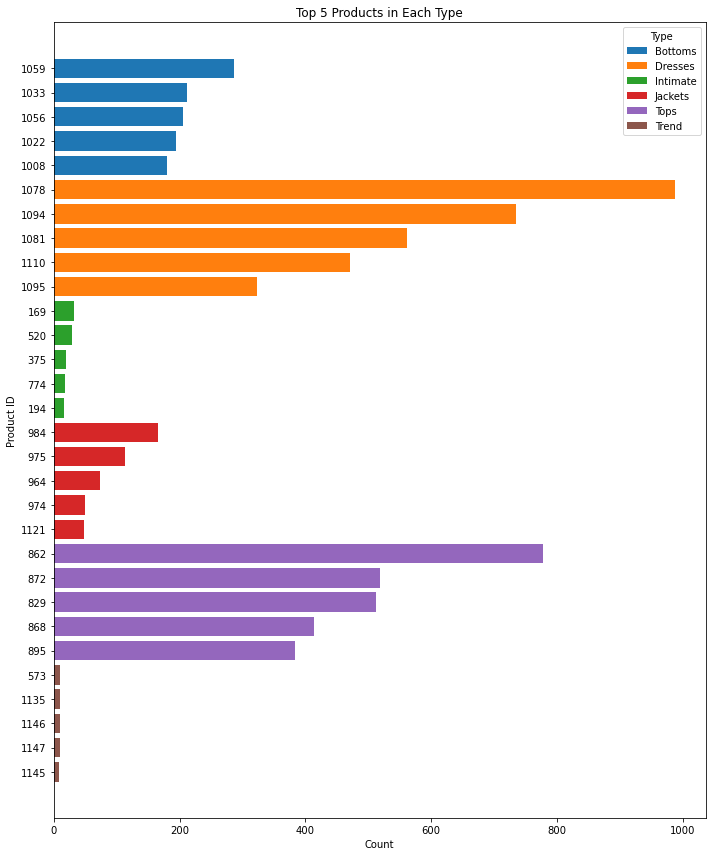

In [196]:
fig, ax = plt.subplots(figsize=(10, 12))

for i, (type_name, group) in enumerate(d2.groupby('Type')):
    ax.barh(y=group['Product_ID'].astype(str), width=group['Count'], label=type_name)

ax.set_xlabel('Count')
ax.set_ylabel('Product ID')
ax.set_title('Top 5 Products in Each Type')
ax.legend(title='Type')

ax.invert_yaxis()

plt.tight_layout()
plt.show()

**Ratings by product type**

In [197]:
df.groupby('Type')['Rating'].value_counts().unstack()

Rating,1,2,3,4,5
Type,,,,,
Bottoms,114,203,407,762,2175
Dresses,222,459,830,1367,3267
Intimate,60,87,177,350,979
Jackets,48,60,90,195,609
Tops,367,729,1300,2208,5444
Trend,10,11,19,26,52


In [159]:
pd.DataFrame(df.groupby('Type')['Rating'].mean())

,Rating
Type,
Bottoms,4.278612
Dresses,4.138812
Intimate,4.271022
Jackets,4.254491
Tops,4.157743
Trend,3.838983


In [158]:
df.groupby('Type')['Rating'].size()

Type
Bottoms      3661
Dresses      6145
Intimate     1653
Jackets      1002
Tops        10048
Trend         118
Name: Rating, dtype: int64

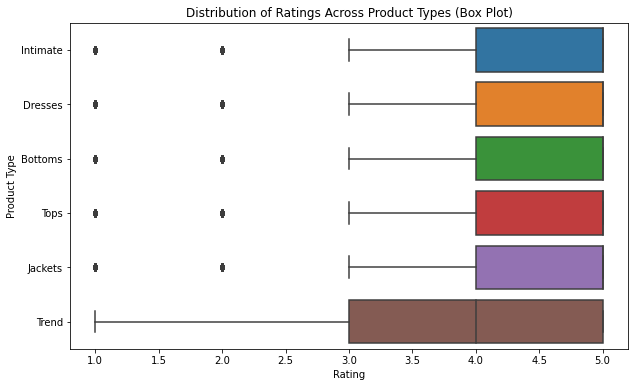

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Type', data=df)
plt.title('Distribution of Ratings Across Product Types (Box Plot)')
plt.ylabel('Product Type')
plt.xlabel('Rating')
plt.show()

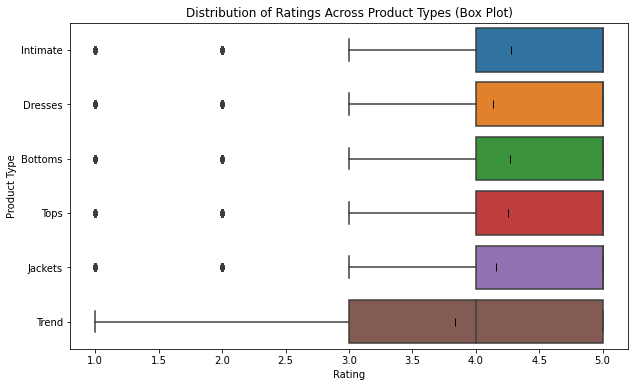

In [167]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Type', data=df)
mean_ratings = df.groupby('Type')['Rating'].mean()
for i, mean_rating in enumerate(mean_ratings):
    plt.plot(mean_rating, i, '|', color='black', markersize=8)
plt.title('Distribution of Ratings Across Product Types (Box Plot)')
plt.ylabel('Product Type')
plt.xlabel('Rating')
plt.show()

In [195]:
proportion_of_ratings = df.groupby('Type')['Rating'].value_counts().unstack().div(df.groupby('Type')['Rating'].size(), axis=0)
proportion_of_ratings

Rating,1,2,3,4,5
Type,,,,,
Bottoms,0.030287,0.053990,0.110877,0.206742,0.598104
Dresses,0.036179,0.073151,0.132974,0.221200,0.536496
Intimate,0.036311,0.051873,0.102594,0.213833,0.595389
Jackets,0.047481,0.058140,0.088178,0.194767,0.611434
Tops,0.036026,0.070710,0.126856,0.219987,0.546421
Trend,0.092437,0.092437,0.159664,0.218487,0.436975


In [219]:
# Calculate the average rating for each product type
average_rating_per_type = df.groupby('Type')['Rating'].mean()
average_rating_per_type

Type
Bottoms     4.288386
Dresses     4.148683
Intimate    4.280115
Jackets     4.264535
Tops        4.170068
Trend       3.815126
Name: Rating, dtype: float64

**Most 5-starred and most 1-starred product type**

In [223]:
most_5_stars = df[df['Rating'] == 5]['Type'].value_counts()
print(f"The product that received the most 5-star ratings is {most_5_stars.idxmax()} with {most_5_stars.max()} 5-star ratings.")

most_1_star = df[df['Rating'] == 1]['Type'].value_counts()
print(f"The product that received the most 1-star ratings is {most_1_star.idxmax()} with {most_1_star.max()} 1-star ratings.")

The product that received the most 5-star ratings is Tops with 5703 5-star ratings.
The product that received the most 1-star ratings is Tops with 376 1-star ratings.


**Most 5-starred and most 1-starred product**

In [203]:
most_5_stars = df[df['Rating'] == 5]['Product_ID'].value_counts()
print(f"The product that received the most 5-star ratings is {most_5_stars.idxmax()} with {most_5_stars.max()} 5-star ratings.")

most_1_star = df[df['Rating'] == 1]['Product_ID'].value_counts()
print(f"The product that received the most 1-star ratings is {most_1_star.idxmax()} with {most_1_star.max()} 1-star ratings.")

The product that received the most 5-star ratings is 1078 with 556 5-star ratings.
The product that received the most 1-star ratings is 862 with 37 1-star ratings.


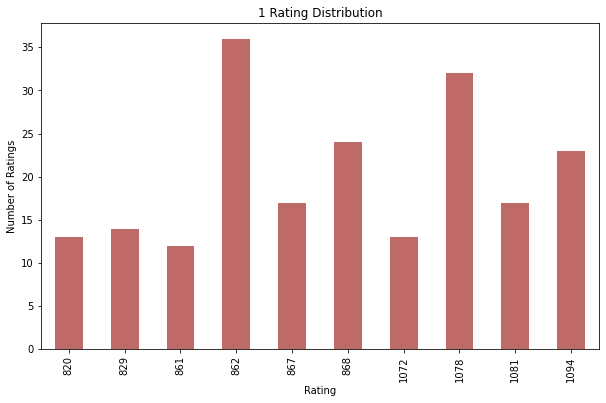

In [154]:
plt.figure(figsize=(10,6))
df[df['Rating'] == 1]['Product_ID'].value_counts()[:10].sort_index().plot(color='brown', kind = 'bar', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('1 Rating Distribution')
plt.show()

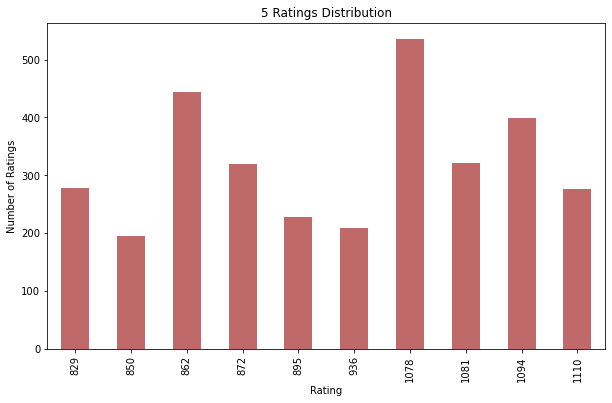

In [155]:
plt.figure(figsize=(10,6))
df[df['Rating'] == 5]['Product_ID'].value_counts()[:10].sort_index().plot(color='brown', kind = 'bar', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('5 Ratings Distribution')
plt.show()

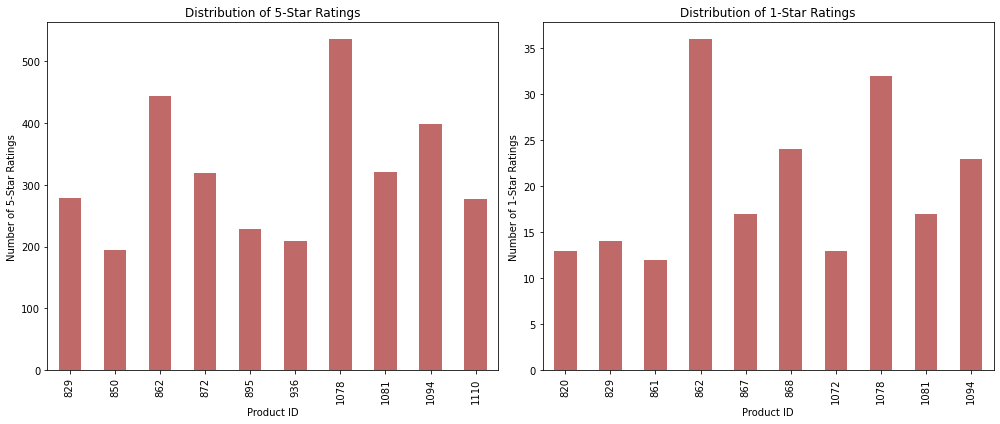

In [157]:
plt.figure(figsize=(14, 6))

# 5-star ratings
plt.subplot(1, 2, 1)
df[df['Rating'] == 5]['Product_ID'].value_counts()[:10].sort_index().plot(color='brown', kind='bar', alpha=0.7)
plt.xlabel('Product ID')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Distribution of 5-Star Ratings')

# 1-star ratings
plt.subplot(1, 2, 2)
df[df['Rating'] == 1]['Product_ID'].value_counts()[:10].sort_index().plot(color='brown', kind='bar', alpha=0.7)
plt.xlabel('Product ID')
plt.ylabel('Number of 1-Star Ratings')
plt.title('Distribution of 1-Star Ratings')
plt.tight_layout()
plt.show()

**Average ratings across age groups**

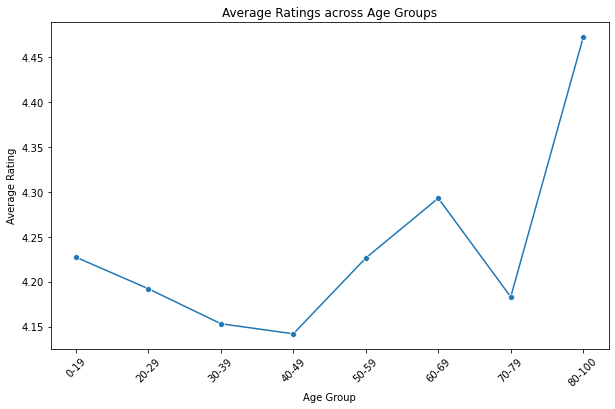

In [51]:
# Average Ratings across Age Groups
mean_ratings_age_group = df.groupby('Age_Group')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_ratings_age_group, x='Age_Group', y='Rating', marker='o')
plt.title('Average Ratings across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**Ratings based on age groups within each product type**

In [29]:
d1 = df.groupby(['Age_Group', 'Type'])['Rating'].mean().unstack()

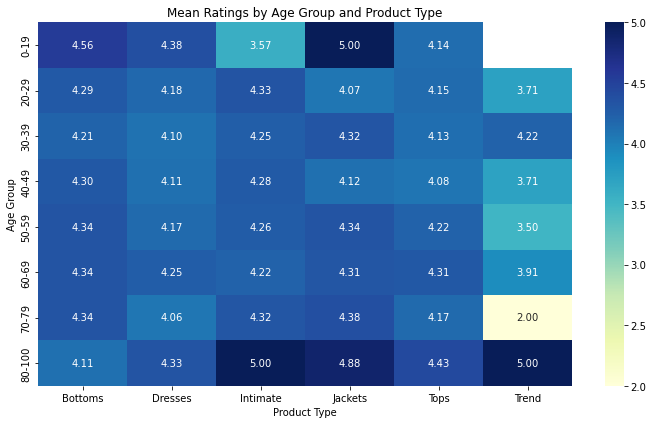

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(d1, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Mean Ratings by Age Group and Product Type')
plt.xlabel('Product Type')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

Performing a correlation analysis led to no definitive conclusions. Further visualizing the product type distribution across different age groups

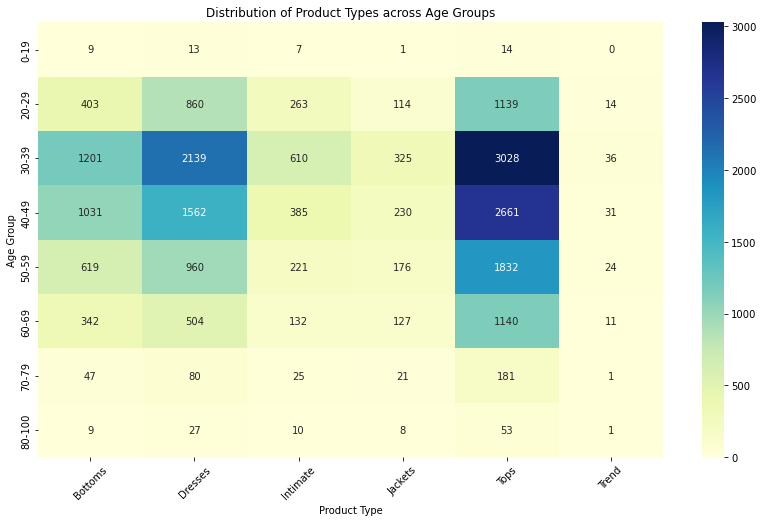

In [36]:
# Visualize Product Type Distribution across Age Groups
product_type_age_group = df.groupby(['Age_Group', 'Type']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(product_type_age_group, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribution of Product Types across Age Groups')
plt.xlabel('Product Type')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

In [177]:
pd.DataFrame(df.groupby(['Age_Group'])['Product_ID'].value_counts().rename('Count').groupby('Age_Group').nlargest(3).reset_index(level=1, drop=True))

Count
Age_Group Product_ID       
0-19      868             2
          1078            2
          1095            2
20-29     1078          132
          1094          119
          862            96
30-39     1078          324
          1094          256
          862           226
40-49     1078          268
          862           225
          1094          171
50-59     1078          162
          862           138
          1094          130
60-69     1078           76
          862            74
          829            70
70-79     862            16
          1078           16
          868            12
80-100    872             7
          1078            7
          936             5

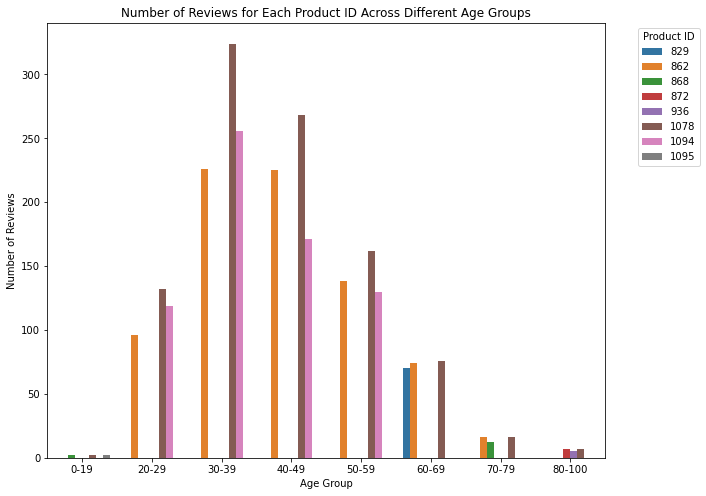

In [189]:
d3 = {
    'Age_Group': ['0-19', '0-19', '0-19', '20-29', '20-29', '20-29', '30-39', '30-39', '30-39', '40-49', '40-49', '40-49', '50-59', '50-59', '50-59', '60-69', '60-69', '60-69', '70-79', '70-79', '70-79', '80-100', '80-100', '80-100'],
    'Product_ID': [868, 1078, 1095, 1078, 1094, 862, 1078, 1094, 862, 1078, 862, 1094, 1078, 862, 1094, 1078, 862, 829, 862, 1078, 868, 872, 1078, 936],
    'Count': [2, 2, 2, 132, 119, 96, 324, 256, 226, 268, 225, 171, 162, 138, 130, 76, 74, 70, 16, 16, 12, 7, 7, 5]
}

d3 = pd.DataFrame(d3)

plt.figure(figsize=(10, 8))
sns.barplot(x='Age_Group', y='Count', hue='Product_ID', data=d3, dodge=True)
plt.title('Number of Reviews for Each Product ID Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Reviews')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Other Analysis Performed on the Dataset**

In [339]:
# Mean ratings for 5 most reviewed products
df.groupby(['Product_ID','Type'])['Rating'].mean().loc[df['Product_ID'].value_counts().head().index]

Product_ID  Type   
1078        Dresses    4.199607
862         Tops       4.196250
1094        Dresses    4.185923
1081        Dresses    4.278066
872         Tops       4.380074
Name: Rating, dtype: float64

In [340]:
# Mean ratings for 5 least reviewed products
df.groupby(['Product_ID','Type'])['Rating'].mean().loc[df['Product_ID'].value_counts().tail().index]

Product_ID  Type    
776         Intimate    5.0
668         Intimate    5.0
633         Bottoms     4.0
734         Intimate    3.0
522         Intimate    4.0
Name: Rating, dtype: float64

In [438]:
# Mean rating per product type
df.groupby(['Type'])['Rating'].mean()

Type
Bottoms     4.288386
Dresses     4.148683
Intimate    4.280115
Jackets     4.264535
Tops        4.170068
Trend       3.815126
Name: Rating, dtype: float64

In [544]:
# Best rated products per age group
df_best_rated = df[df['Rating']==5].groupby(['Age_Bucket', 'Type']).size().unstack()
best_rated = {}

for i in df_best_rated.index:
    best_prod = df_best_rated.loc[i].idxmax()
    best_rated[i] = best_prod
best_rated

{'0-19': 'Dresses',
 '20-29': 'Tops',
 '30-39': 'Tops',
 '40-49': 'Tops',
 '50-59': 'Tops',
 '60-69': 'Tops',
 '70-79': 'Tops',
 '80-100': 'Tops'}

In [546]:
# Worst rated products per age group
df_best_rated = df[df['Rating']==1].groupby(['Age_Bucket', 'Type']).size().unstack()
worst_rated = {}

for i in df_best_rated.index:
    worst_prod = df_best_rated.loc[i].idxmax()
    worst_rated[i] = worst_prod
worst_rated

{'0-19': 'Intimate',
 '20-29': 'Tops',
 '30-39': 'Tops',
 '40-49': 'Tops',
 '50-59': 'Tops',
 '60-69': 'Tops',
 '70-79': 'Tops',
 '80-100': 'Dresses'}